

- from file
- from dataframes
- from anndata
- images
- as dataset
- skip preprocessing

# How to Prepare Your Data for AUTOENCODIX
There are `two main ways` to pass data to `AUTOENCODIX` and we support `three main data modalities`. For this main modalities, we offer `seven main use cases`. 
Besides that you can chose if we should preprocess the data or you want to start with training the models directly.  

**IMPORTANT**

> This tutorial explains mainly the type of data we allow and how to format the data, so that AUTOENCODIX can work with it. If you're unfamilar with general concepts,  
> we recommend to follow the `Getting Started - Vanillix` Tutorial first.


The `two main ways` to pass data are:  
- providing a file path in the config.
- passing the data directly to our.
<br><br>

The `three main data modalities` are:
- tabular numeric data  
- sparse numeric data (Single Cell) 
- image data

The `seven main use cases are`:
-  combining multi-omics data from single cell sequencing.
-  combining multi-omics data from bulk sequencing (e.g. mRNA and methylation).
-  "translating" between bulk sequencing data.
-  "translating" bulk and image an vice versa.
-  "translating" between single cell data.
-  training an image autoencoder. 
  
We encode these cases in our `DataCase` class and you need to specify in the config which `DataCase` you have. This is shown in the code in the next section.
``

The general way to feed data to our pipeline is independent of the specific model (Varix, XModalix, etc.). There might be minor pipeline specfic requirements, for example for  `Ontix`, we won't cover these here, please refer to the Tutorials of the specfic pipeline. Here we use `XModalix`  and `Varix` as an example. 

## 1) Passing Data from File
Depending on which pipeline you use, you have different will be interested in one of our `seven main use cases` as described above.
<br><br>
Regardless of the use case, the principle of passing data is always the same, just your files types will differ and you need to specify the use case in the config via the `DataCase`:
```python
class DataCase(str, Enum):
    MULTI_SINGLE_CELL = "Multi Single Cell"
    MULTI_BULK = "Multi Bulk"
    BULK_TO_BULK = "Bulk<->Bulk"
    IMG_TO_BULK = "IMG<->Bulk"
    SINGLE_CELL_TO_SINGLE_CELL = "Single Cell<->Single Cell"
    SINGLE_CELL_TO_IMG = "Single Cell<->IMG"
    IMG_TO_IMG = "IMG<->IMG" # standard image autoencoder.

```
#### 1.1 Combining mulit-omics data from bulk-sequencing
First we need to prepare our config object. We can (a) directly provide an object in python, or (b) provide an YAML file. We show option (a). For (b) refer to [1].


ATTENTION:
If you use `.txt` or `.csv` files, it is best practice to add the `sep` parameter. If none is given, the reader will try to auto-detect the separator, which is error prone.
This would loke like:

**IMPORTANT** 
>For all your bulk data files, we expect the first column to be some kind of unique sample id. Please prepare the data accordingly.

[1] Tutorials/DeepDives/ConfigTutorial.ipynb <br>

**First make sure we are in the root of our package:**

In [1]:
import os

p = os.getcwd()
d = "autoencodix_package"
if d not in p:
    raise FileNotFoundError(f"'{d}' not found in path: {p}")
os.chdir(os.sep.join(p.split(os.sep)[: p.split(os.sep).index(d) + 1]))
print(f"Changed to: {os.getcwd()}")


Changed to: /Users/maximilianjoas/development/autoencodix_package


**Now we can perpare the config:**
> Besides the actual data files, we expect one `annotation` file with metadata. We add the param `data_type` and pass `ANNOTATION` to it. See code below.

reading parquet: data/raw/data_mrna_seq_v2_rsem_formatted.parquet
reading parquet: data/raw/data_methylation_per_gene_formatted.parquet
reading parquet: data/raw/data_clinical_formatted.parquet
anno: paired has shape: (10013, 54) before drop na
anno: paired has shape: (10013, 54) after drop na
anno key: paired


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/base/_base_trainer.py:107: UserWarning: increased batch_size to 33 for trainset, to avoid dropping samples and having batches (makes trainingdynamics messy with missing samples per epoch) of size one (fails for Models with BachNorm)
  warnings.warn(


Epoch 1 - Train Loss: 22.8715
Sub-losses: recon_loss: 22.8715, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 24.6664
Sub-losses: recon_loss: 24.6650, var_loss: 0.0014, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 19.6092
Sub-losses: recon_loss: 19.5734, var_loss: 0.0358, anneal_factor: 0.0344, effective_beta_factor: 0.0034
Epoch 2 - Valid Loss: 25.5397
Sub-losses: recon_loss: 25.3620, var_loss: 0.1776, anneal_factor: 0.0344, effective_beta_factor: 0.0034
Epoch 3 - Train Loss: 19.0601
Sub-losses: recon_loss: 18.4774, var_loss: 0.5827, anneal_factor: 0.9656, effective_beta_factor: 0.0966
Epoch 3 - Valid Loss: 17.9552
Sub-losses: recon_loss: 17.4065, var_loss: 0.5487, anneal_factor: 0.9656, effective_beta_factor: 0.0966
Creating plots ...


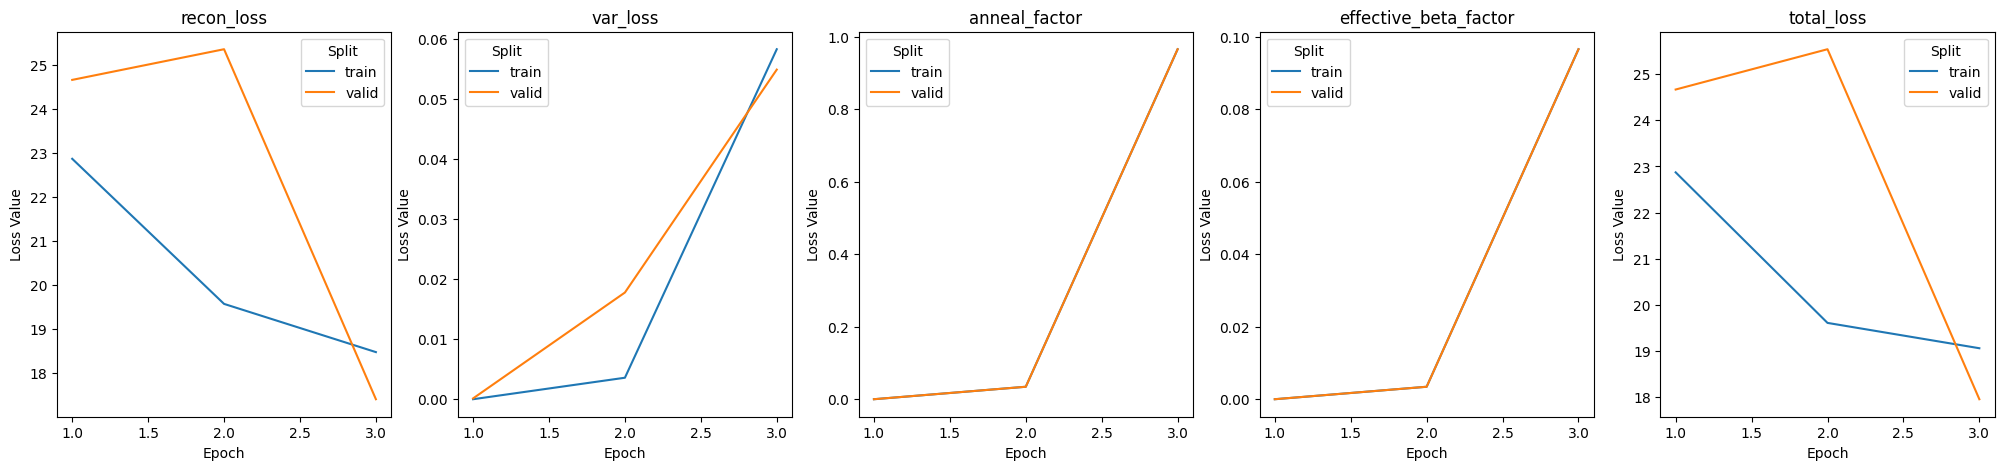

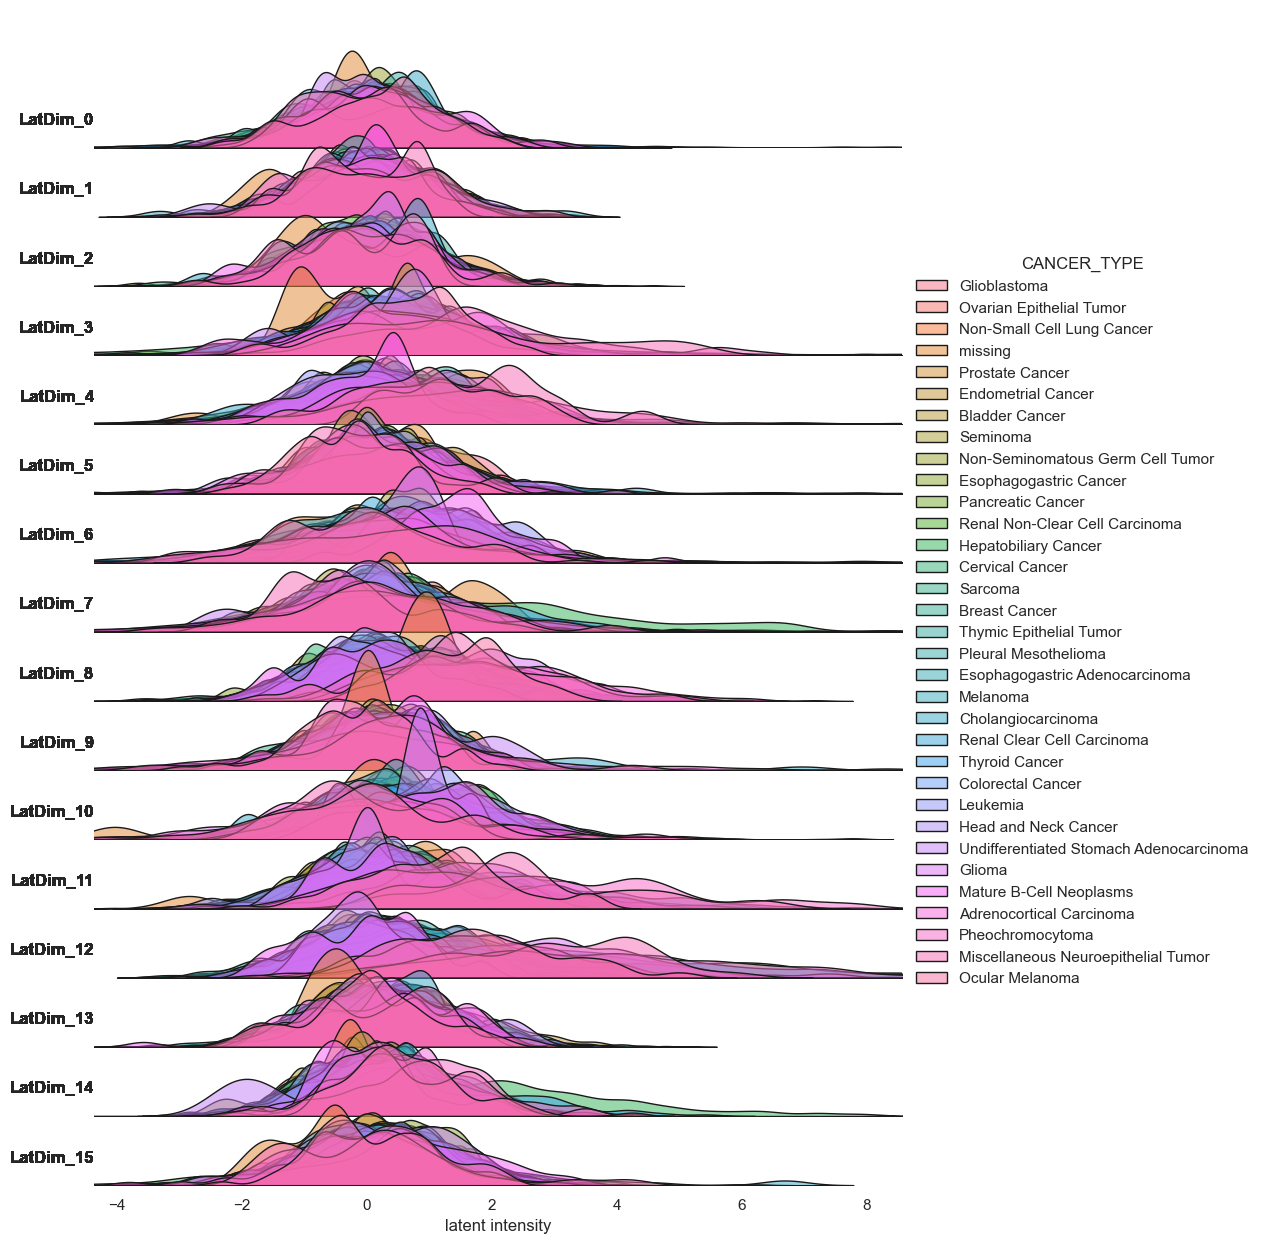

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


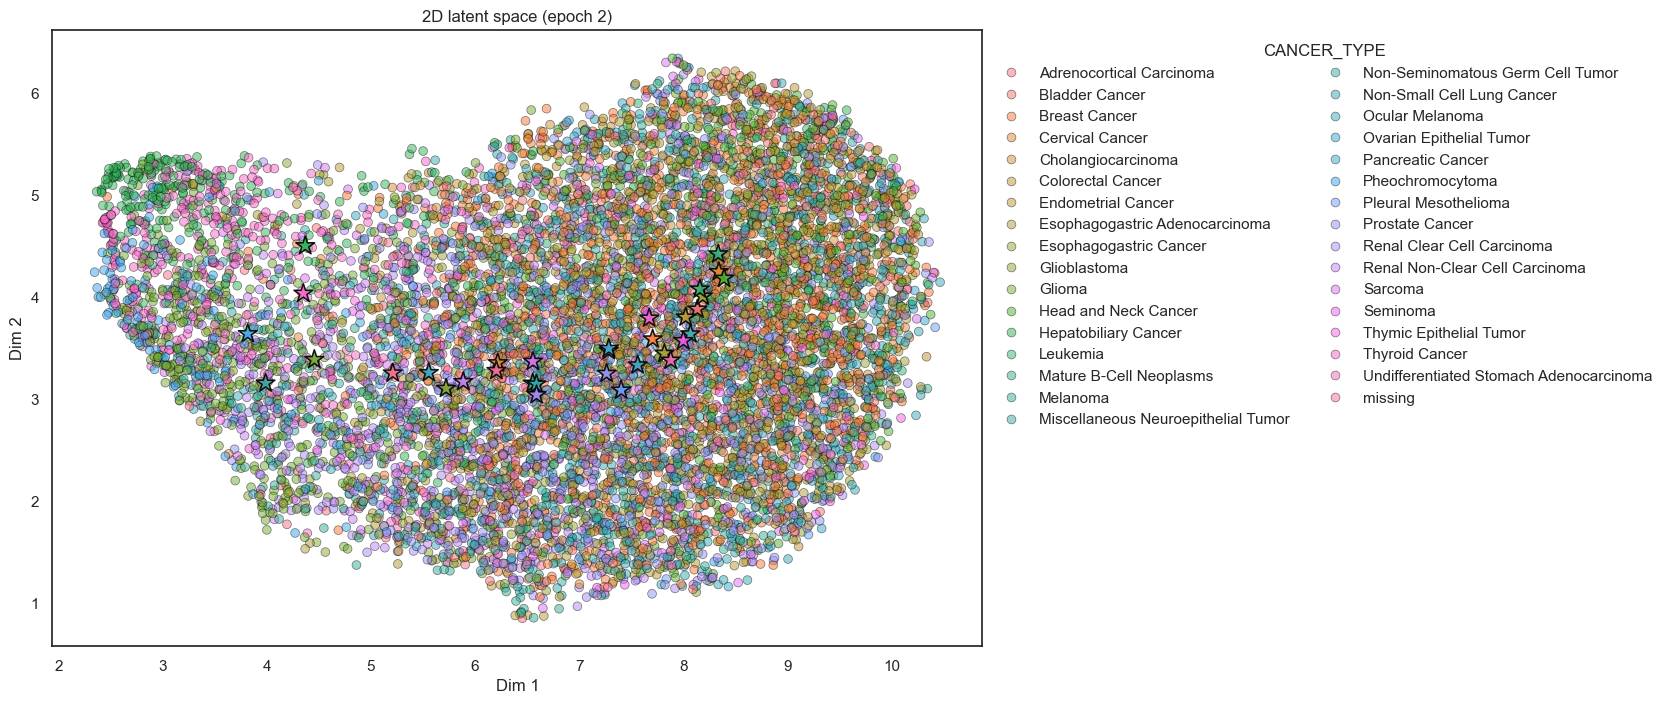

In [2]:
import os
import autoencodix as acx
from autoencodix.configs.default_config import DataConfig, DataInfo, DataCase
from autoencodix.configs import VarixConfig

# First we need to define our file paths
root_dir = os.path.join("data/raw")
meth_file = "data_methylation_per_gene_formatted.parquet"
mrna_file = "data_mrna_seq_v2_rsem_formatted.parquet"
clin_file = "data_clinical_formatted.parquet"


"""
Our config class has the attribute `data_config`.
Here, we fill the `data_info` Dict, by defining names for our data modalities ("RNA" for example).
The value of this Dict is a instance of the `DataInfo` class. All we need to pass here is a `file_path` argument.
"""
data_config = DataConfig(
    annotation_columns=["CANCER_TYPE"],
    data_info={
        "RNA": DataInfo(file_path=os.path.join(root_dir, mrna_file)),
        "METHYLATION": DataInfo(file_path=os.path.join(root_dir, meth_file)),
        "CLINICAL": DataInfo(
            file_path=os.path.join(root_dir, clin_file), data_type="ANNOTATION"
        ),
    },
)

"""
Lastly, we pass our data_config to the VarixConfig. Remember to pass the appropriate `DataCase`.
"""
bulk_config = VarixConfig(data_config=data_config, data_case=DataCase.MULTI_BULK)
varix = acx.Varix(config=bulk_config)

result_varix = varix.run()
varix.show_result(params=["CANCER_TYPE"])

In [3]:
ds = result_varix.datasets.train
ds.metadata["paired"]["CANCER_TYPE"].isna().sum()

np.int64(0)

#### 1.2 Use Single Cell Data
This works analog to bulk/tabular data. You probably will pass `h5ad` files instead of parquet or csv files.  
For single cell data you most likely only use one data modality, so the term `MULTI_SC` is a bit misleading from our DataCase; think of it as 1-n modalities you can pass. Also, we most likely don't have an `annotation` file, because this information is already encoded in the `h5as` file.

In [ ]:
filepath = "data/raw/Sc-2-mini.h5ad"
data_config = DataConfig(annotation_columns=["cell_type"],
    data_info={"SC": DataInfo(file_path=filepath, is_single_cell=True)},
)
sc_config = VarixConfig(data_config=data_config, data_case=DataCase.MULTI_SINGLE_CELL)
varix_sc = acx.Varix(config=sc_config)
result_sc = varix_sc.run()

Number of common cells: 4554
Index(['author_cell_type', 'age_group', 'donor_id', 'nCount_RNA',
       'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile',
       'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'organism_ontology_term_id', 'sex_ontology_term_id',
       'tissue_ontology_term_id', 'suspension_type', 'is_primary_data',
       'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')
mudata: View of MuData object with n_obs × n_vars = 4554 × 9009
  obs:	'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_t

Creating plots ...


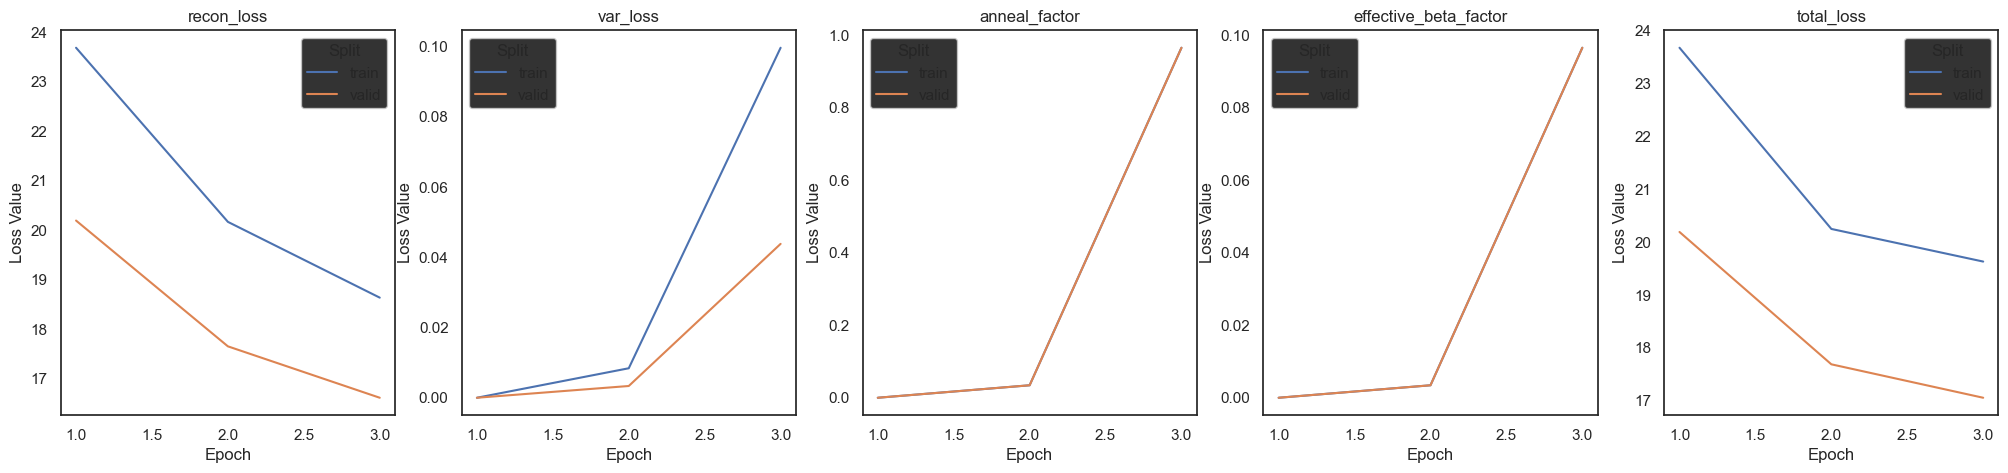

ValueError: Length of values (1165824) does not match length of index (72864)

In [7]:

varix_sc.show_result(params=["cell_type"])

In [6]:

result_sc.datasets.train.metadata.head()

,SC:author_cell_type,SC:age_group,SC:donor_id,SC:nCount_RNA,SC:nFeature_RNA,SC:nCount_ATAC,SC:nFeature_ATAC,SC:TSS_percentile,SC:nucleosome_signal,SC:percent_mt,...,SC:cell_type,SC:assay,SC:disease,SC:organism,SC:sex,SC:tissue,SC:self_reported_ethnicity,SC:development_stage,SC:observation_joinid,SC:n_genes
index,,,,,,,,,,,,,,,,,,,,,
11_AAACCGAAGGAATAAC-1,RG,early fetal,EaFet2,7491,3212.0,5836.0,4794.0,0.70,0.536832,0.122574,...,radial glial cell,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,19th week post-fertilization stage,Ci*j^oVE%Q,902
11_AAAGCAAGTTGAATCG-1,RG,early fetal,EaFet2,4992,2361.0,7004.0,5762.0,0.55,0.634487,0.000000,...,radial glial cell,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,19th week post-fertilization stage,4^&2o@VZig,729
11_AACCGCTCATGAAGTA-1,RG,early fetal,EaFet2,214,194.0,615.0,597.0,0.76,0.703333,0.154261,...,radial glial cell,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,19th week post-fertilization stage,YClMgm1B`_,337
11_AACGACAAGCGAGGTG-1,IN-fetal,early fetal,EaFet2,1579,993.0,4236.0,3516.0,0.98,0.630411,0.121507,...,inhibitory interneuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,19th week post-fertilization stage,Pu`vvgM9LZ,317
11_AACGCCCAGACAAGTG-1,IN-fetal,early fetal,EaFet2,2025,1179.0,3885.0,3301.0,0.97,0.685466,0.029551,...,inhibitory interneuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,19th week post-fertilization stage,5B0kz!~l&9,336
